# Ch2. Time series graphics

## Sec. 2.1 `ts` object

replace `ts()` function in R as `date_range()` in `pandas`

In [136]:
import pandas as pd
import datetime

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'

import seaborn as sns


In [34]:
idx = pd.date_range('2012', periods=5, freq='Y').year
values = [123, 39, 78, 52, 110]

ts = pd.Series(values, index=idx)
ts

2012    123
2013     39
2014     78
2015     52
2016    110
dtype: int64

In [35]:
ts = pd.Series([123, 39, 78, 52, 110],
               index=pd.date_range('2012', periods=5, freq='Y').year)
ts

2012    123
2013     39
2014     78
2015     52
2016    110
dtype: int64

## Sec. 2.2 Time plots


Weekly economy passenger load on Ansett Airlines between Australia’s two largest cities.

In [65]:
melsyd = pd.read_csv('../data/melbourne_sydney.csv')
melsyd['index'] = melsyd['index'].str.split('T', expand=True).iloc[:,0]
melsyd['index'] = pd.to_datetime(melsyd['index']) 
melsyd.set_index('index', inplace=True)

display(melsyd)
melsyd.info()

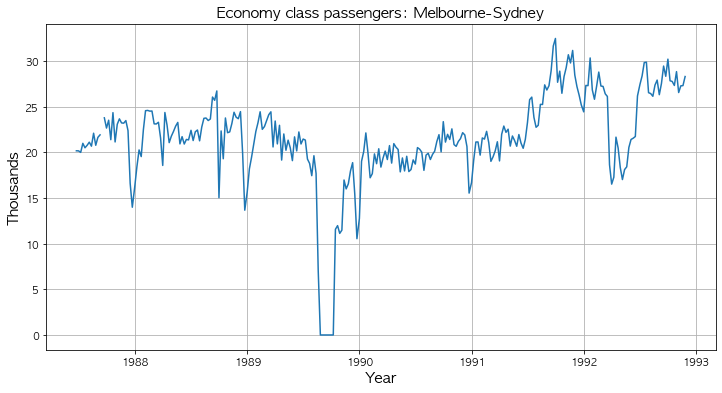

In [106]:
fig = plt.subplots(figsize=(12,6))

plt.plot(melsyd['Economy.Class'])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Thousands', fontsize=15)
plt.title('Economy class passengers: Melbourne-Sydney', fontsize=15)
plt.grid()

plt.show()

Graph 분석

- 1989년에는 파업 때문에 수송객이 없습니다.
- 몇몇 이코노미석을 비즈니스석으로 교체했던 시도 때문에, 1992년에는 수송량이 감소했습니다.
- 1991년 후반에는 수송객이 크게 증가했습니다.
- 휴가철 효과 때문에 매 연초에 일시적으로 크게 하락하는 몇몇 지점이 있습니다.
- 시계열의 수준(level)에 1987년에는 증가하고, 1989년에는 감소하고, 1990년부터 1991년에는 다시 증가하는 장기적인 요동(long-term fluctuation)이 있습니다.
- 몇몇 시점에는 관측값이 없습니다. 

In [103]:
a10 = pd.read_csv('../data/drug_sale.csv')
# pd.to_datetime(a10['index']).dt.month
a10['index'] = pd.to_datetime(a10['index'])

a10.set_index('index', inplace=True)

display(a10)
a10.info()

,value
index,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
value    204 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


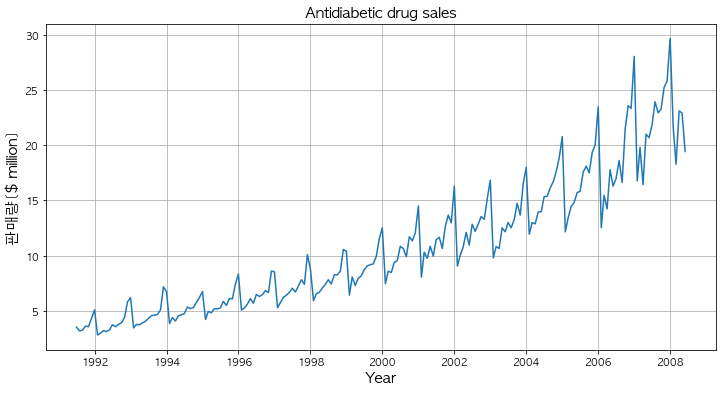

In [105]:
fig = plt.subplots(figsize=(12,6))

plt.plot(a10)
plt.xlabel('Year', fontsize=15)
plt.ylabel('판매량[$ million]', fontsize=15)
plt.title('Antidiabetic drug sales', fontsize=15)
plt.grid()

plt.show()

## Sec. 2.3 Time series patterns

- Trend
- Seasonal
- Cyclic


 When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.


## Sec. 2.4 Seasonal plots


In [133]:
a10['year'] = pd.to_datetime(a10.index).year
a10['month'] = pd.to_datetime(a10.index).month

display(a10.head())

a10_pivot = pd.pivot_table(a10, values='value', index=['year','month'])
a10_pivot.head()

,value,year,month
index,,,
1991-07-01,3.526591,1991,7
1991-08-01,3.180891,1991,8
1991-09-01,3.252221,1991,9
1991-10-01,3.611003,1991,10
1991-11-01,3.565869,1991,11


value
year month          
1991 7      3.526591
     8      3.180891
     9      3.252221
     10     3.611003
     11     3.565869

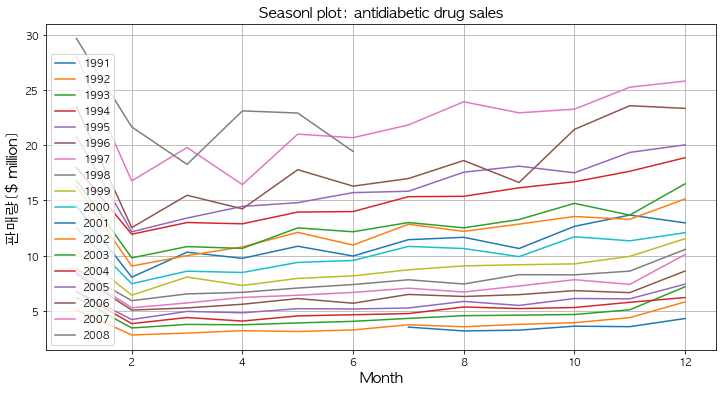

In [135]:
fig = plt.subplots(figsize=(12,6))
for year in a10_pivot.index.get_level_values(0).unique():
    plt.plot(a10_pivot.loc[year],label=year)
    
plt.xlabel('Month', fontsize=15)
plt.ylabel('판매량[$ million]', fontsize=15)
plt.title('Seasonl plot: antidiabetic drug sales', fontsize=15)
plt.grid()
plt.legend()

plt.show()

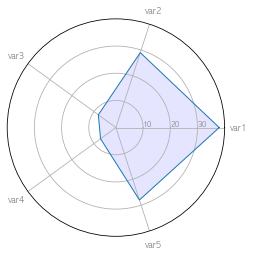

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
